### Get the scale of incoming velocity

In [1]:
import cmocean as cmo
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib as mpl
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr
import canyon_tools.readout_tools as rout
import canyon_tools.savitzky_golay as sg
import xarray as xr
import matplotlib.gridspec as gspec

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
sns.set_context('notebook')
sns.set_style('whitegrid')

In [3]:
gridAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/gridGlob.nc')
stAst = xr.open_dataset('/data/kramosmu/results/TracerExperiments/UPW_10TR_BF2_AST/01_Ast03/stateGlob.nc')
stUpwUpw = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_BF2_AST/05_upw_pool/stateGlob.nc')
stRel = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/03_relax_base/stateGlob.nc')
stUpwRel = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_RELAX_AST/01_relax_pool/stateGlob.nc')
stDnw = xr.open_dataset('/data/kramosmu/results/TracerExperiments/REV_10TR_BF2_AST/03_dnw_pool/stateGlob.nc')


Text(0.5,1,'Astoria upstream u/ms$^{-1}$, advective phase mean')

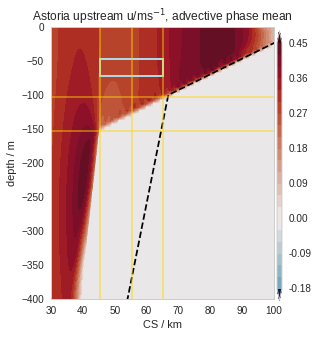

In [4]:
xind = 100
yslice = slice(0,360)
tslice = slice(8,20)
    
UAst = (stAst.U.isel(T=tslice,Xp1=xind,Y=yslice)).mean(dim='T')

fig, (ax0) = plt.subplots(1,1, figsize=(4,5))

mesh = ax0.contourf(gridAst.Y[yslice]/1000, gridAst.RC, UAst,20, 
                    cmap=cmo.cm.balance, vmin=-0.5, vmax=0.5, extend='both')
ax0.plot(gridAst.Y[yslice]/1000, -gridAst.Depth[yslice,180],'k--')
ax0.set_ylabel('depth / m')
ax0.set_xlabel('CS / km')
ax0.axvline(gridAst.Y[230]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[182]/1000,color='gold',alpha=0.5)
ax0.axvline(gridAst.Y[130]/1000,color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[30],color='gold',alpha=0.5)
ax0.axhline(gridAst.RC[20],color='gold',alpha=0.5)
cbar_ax = fig.add_axes([0.91, 0.12, 0.017, 0.75])
cb=fig.colorbar(mesh, cax=cbar_ax, format='%.2f')
rect = pat.Rectangle((gridAst.Y[130]/1000,gridAst.RC[14]),
                     (gridAst.Y[230]-gridAst.Y[130])/1000,
                     -(gridAst.RC[19]-gridAst.RC[14]),
                     linewidth=2,edgecolor='lightblue',facecolor='none')
ax0.add_patch(rect)

ax0.set_ylim(-400,0) 
ax0.set_xlim(30,100) 


ax0.set_title('Astoria upstream u/ms$^{-1}$, advective phase mean' )

In [7]:
xind = 80

yslice_A = slice(130,230)
zslice_A = slice(14,19)

names = ['Ast','UPW-UPW','RELAX','UPW-RELAX', 'UPW-DNW']    
UAst = ((stAst.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UUpwUpw = ((stUpwUpw.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
URel = ((stRel.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UUpwRel = ((stUpwRel.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')
UDnw = ((stDnw.U.isel(Z=zslice_A,Xp1=xind,Y=yslice_A)).mean(dim='Z')).mean(dim='Y')


Ast : 0.300 $\pm$ 0.002 ms$^-1$ 
UPW-UPW : 0.300 $\pm$ 0.002 ms$^-1$ 
RELAX : 0.222 $\pm$ 0.031 ms$^-1$ 
UPW-RELAX : 0.222 $\pm$ 0.031 ms$^-1$ 


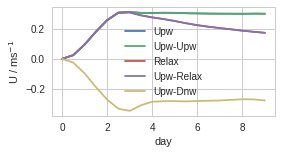

In [8]:
sns.set_context('notebook')
fig, (ax0) = plt.subplots(1,1, figsize=(4,2))
sns.set_palette('colorblind',4)
ax0.plot(np.arange(19)/2.,UAst, label='Upw')
ax0.plot(np.arange(19)/2.,UUpwUpw, label='Upw-Upw')
ax0.plot(np.arange(19)/2.,URel, label='Relax')
ax0.plot(np.arange(19)/2.,UUpwRel, label='Upw-Relax')
ax0.plot(np.arange(19)/2.,UDnw, label='Upw-Dnw')

ax0.set_ylabel( 'U / ms$^{-1}$')
ax0.set_xlabel('day')
ax0.legend(loc=0)

for U, name in zip([UAst[8:18],UUpwUpw[8:18],URel[8:18],UUpwRel[8:18]], names):
    u_mean = np.mean(U)
    u_std = np.std(U)
    print(r'%s : %0.3f $\pm$ %0.3f ms$^-1$ ' % (name, u_mean, u_std))
plt.savefig('incoming_U_revision_runs.eps', format='eps', bbox_inches='tight')